<a href="https://colab.research.google.com/github/pseudo-sm/cv-dl-basic/blob/master/MNISTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from torch import nn
import torch
import pandas as pd

In [85]:
def generate_random(size):
  tensor = torch.randn(size)
  return tensor

In [86]:
class Descriminator(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(784,200),nn.LeakyReLU(0.02),nn.LayerNorm(200),nn.Linear(200,1),nn.Sigmoid()
        )
    self.loss_function = nn.BCELoss()
    self.optimiser = torch.optim.Adam(self.parameters(),lr=0.0001)
    self.counter = 0
    self.progress = []
  
  def forward(self,inputs):
    return self.model(inputs)
  
  def train(self,inputs,targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.counter+=1
    if(self.counter%10==0):
      self.progress.append(loss.item())
    if(self.counter%1000==0):
      print("Counter : {}".format(self.counter))
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns = ['Loss'])
    df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))


In [87]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [125]:
class MnistDataset(Dataset):
  def __init__(self,csv_file):
    self.data_df = pd.read_csv(csv_file)
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self,index):
    label=self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label]=1.0
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
    return label,image_values,target
  
  def plot_image(self,index):
    arr = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("Label : {}".format(self.data_df.iloc[index,0]))
    plt.imshow(arr,interpolation='none',cmap='Blues')



In [89]:
class Generator(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(100,200),nn.LeakyReLU(0.02),nn.LayerNorm(200),nn.Linear(200,784),nn.Sigmoid()
        )
    self.loss_function = nn.BCELoss()
    self.optimiser = torch.optim.Adam(self.parameters(),lr=0.0001)
    self.counter = 0
    self.progress = []
  
  def forward(self,inputs):
    return self.model(inputs)
  
  def train(self,D,inputs,targets):
    g_output = self.forward(inputs)
    d_output = D.forward(g_output)
    loss = D.loss_function(d_output,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.counter+=1
    if(self.counter%10==0):
      self.progress.append(loss.item())
    if(self.counter%1000==0):
      print("Counter : {}".format(self.counter))
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns = ['Loss'])
    df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))


In [90]:
def get_sample(G):
  img = G.forward(generate_random(100)).detach().reshape(28,28)
  plt.imshow(img,interpolation='none',cmap='Blues')


In [126]:
mnist_dataset = MnistDataset("/content/mnist_train.csv")

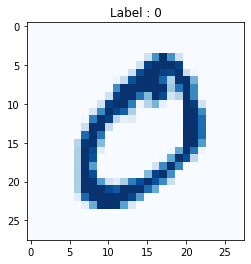

In [127]:
mnist_dataset.plot_image(1)

In [128]:
D = Descriminator()
G = Generator()

In [129]:
for i in range(4):
  for label,image_data_tensor,target_tensor in mnist_dataset:
    D.train(image_data_tensor,torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(100)).detach(),torch.FloatTensor([0.0]))
    G.train(D,generate_random(100),torch.FloatTensor([1.0]))

Counter : 1000
Counter : 2000
Counter : 1000
Counter : 3000
Counter : 4000
Counter : 2000
Counter : 5000
Counter : 6000
Counter : 3000
Counter : 7000
Counter : 8000
Counter : 4000
Counter : 9000
Counter : 10000
Counter : 5000
Counter : 11000
Counter : 12000
Counter : 6000
Counter : 13000
Counter : 14000
Counter : 7000
Counter : 15000
Counter : 16000
Counter : 8000
Counter : 17000
Counter : 18000
Counter : 9000
Counter : 19000
Counter : 20000
Counter : 10000
Counter : 21000
Counter : 22000
Counter : 11000
Counter : 23000
Counter : 24000
Counter : 12000
Counter : 25000
Counter : 26000
Counter : 13000
Counter : 27000
Counter : 28000
Counter : 14000
Counter : 29000
Counter : 30000
Counter : 15000
Counter : 31000
Counter : 32000
Counter : 16000
Counter : 33000
Counter : 34000
Counter : 17000
Counter : 35000
Counter : 36000
Counter : 18000
Counter : 37000
Counter : 38000
Counter : 19000
Counter : 39000
Counter : 40000
Counter : 20000
Counter : 41000
Counter : 42000
Counter : 21000
Counter : 

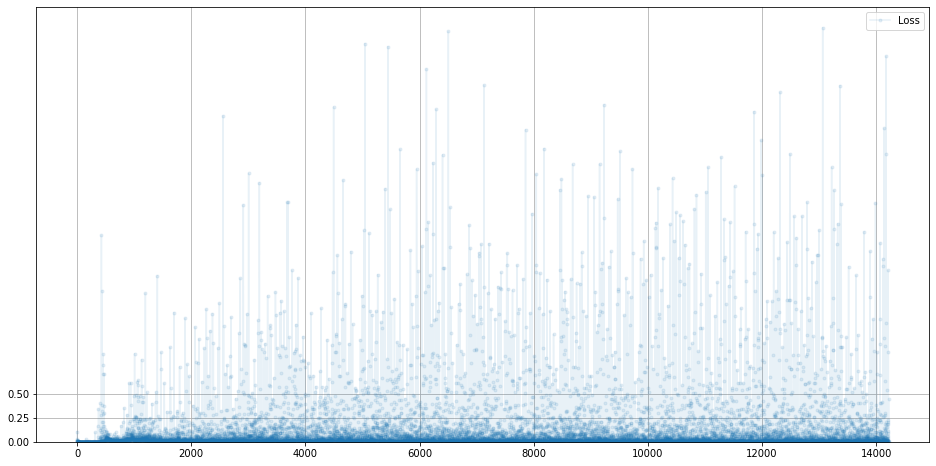

In [130]:
D.plot_progress()

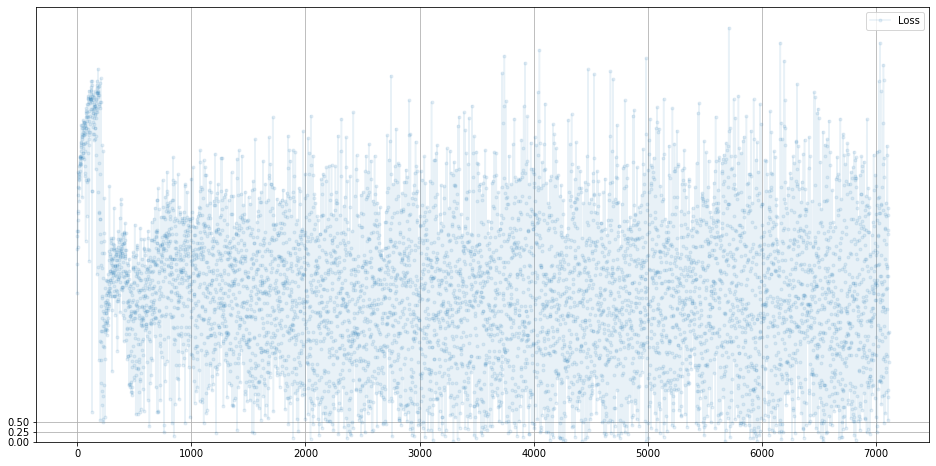

In [131]:
G.plot_progress()

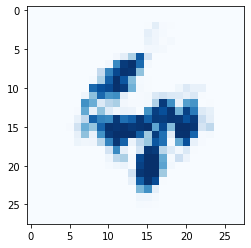

In [142]:
get_sample(G)